In [20]:
for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print("GPU is available and being used.")

Loading data from: C:/Users/Souma Chakraborty/OneDrive/Desktop/ML_RESEARCH/Fruit And Vegetable Diseases Dataset
Found 7579 images in total.
Processed 5362 images.
Class mapping: {np.str_('Apple_healthy_augmented'): np.int64(0), np.str_('Apple_rotten_augmented'): np.int64(1)}
Training set: 4289 images
Validation set: 1073 images
Number of classes: 2 (binary classification)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

c:\Users\Souma Chakraborty\OneDrive\Desktop\ML_RESEARCH\resenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.8151 - loss: 0.4036 - val_accuracy: 0.9618 - val_loss: 0.1219
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.9485 - loss: 0.1393 - val_accuracy: 0.9720 - val_loss: 0.0843
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9626 - loss: 0.0987 - val_accuracy: 0.9786 - val_loss: 0.0731
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9777 - loss: 0.0726 - val_accuracy: 0.9842 - val_loss: 0.0563
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9840 - loss: 0.0542 - val_accuracy: 0.9879 - val_loss: 0.0464
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9823 - loss: 0.0501 - val_accuracy: 0.9870 - val_loss: 0.0411
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9899 - loss: 0.0351 - val_accu

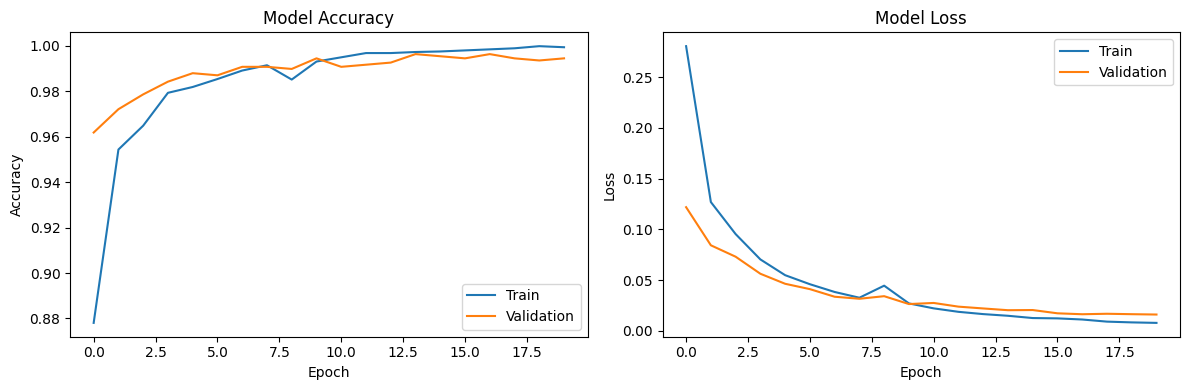


Evaluating model on validation data...
34/34 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9943 - loss: 0.0129


loss: 0.0161
compile_metrics: 0.9944
Model saved at: C:/Users/Souma Chakraborty/OneDrive/Desktop/ML_RESEARCH/apple_resnet_tf.h5
Training complete!


In [ ]:
# Cell 1: Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils import paths
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Cell 2: Configure parameters
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
IMAGE_DIMS = (224, 224)
DATASET_DIR = "C:/Users/Souma Chakraborty/OneDrive/Desktop/ML_RESEARCH/Fruit And Vegetable Diseases Dataset"
ALLOWED_CLASSES = {"Apple_healthy_augmented", "Apple_rotten_augmented"}
MODEL_SAVE_PATH = "C:/Users/Souma Chakraborty/OneDrive/Desktop/ML_RESEARCH/apple_resnet_tf.h5"

# Cell 3: Define data loading function
def load_data(dataset_dir, allowed_classes):
    """Loads image data and labels from the dataset directory."""
    data = []
    labels = []
    imagePaths = list(paths.list_images(dataset_dir))
    print(f"Found {len(imagePaths)} images in total.")
    
    for imagePath in imagePaths:
        label = imagePath.split(os.path.sep)[-2]
        if label not in allowed_classes:
            continue
            
        image = cv2.imread(imagePath)
        if image is None:
            continue
            
        image = cv2.resize(image, IMAGE_DIMS)
        image = img_to_array(image)
        image = preprocess_input(image)
        
        data.append(image)
        labels.append(label)
    
    if not data:
        raise ValueError("No images were processed. Check your dataset directory and paths.")
    
    # Convert labels to numerical format using LabelEncoder
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    
    print(f"Processed {len(data)} images.")
    print(f"Class mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    return np.array(data, dtype="float32"), np.array(labels), le

# Cell 4: Define data preprocessing function
def preprocess_data(data, labels, test_size=0.2):
    """Splits data into training and validation sets."""
    trainX, valX, trainY, valY = train_test_split(data, labels, 
                                                 test_size=test_size, 
                                                 stratify=labels, 
                                                 random_state=42)
    
    print(f"Training set: {len(trainX)} images")
    print(f"Validation set: {len(valX)} images")
    
    return trainX, valX, trainY, valY

# Cell 5: Define data generator function
def get_data_generators(trainX, valX, trainY, valY, batch_size):
    """Creates data generators for training and validation without augmentation."""
    train_datagen = ImageDataGenerator()
    val_datagen = ImageDataGenerator()
    
    train_generator = train_datagen.flow(trainX, trainY, batch_size=batch_size)
    val_generator = val_datagen.flow(valX, valY, batch_size=batch_size)
    
    return train_generator, val_generator

# Cell 6: Define model building function for binary classification
def build_model(input_shape):
    """Builds the ResNet50-based model for binary classification."""
    base_model = keras.applications.ResNet50(
        weights='imagenet', 
        include_top=False, 
        input_shape=input_shape
    )
    
    # Freeze the base model layers
    base_model.trainable = False
    
    # Build the model with a single sigmoid output
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

# Cell 7: Define model training function (without ModelCheckpoint)
def compile_and_train_model(model, train_generator, val_generator, epochs, lr):
    """Compiles and trains the model without saving checkpoints each epoch."""
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Only use EarlyStopping to avoid saving each epoch
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
    
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        callbacks=callbacks
    )
    
    return history, model

# Cell 8: Define evaluation and visualization functions
def evaluate_model(model, val_generator):
    """Evaluates the model on validation data."""
    print("\nEvaluating model on validation data...")
    results = model.evaluate(val_generator)
    
    for name, value in zip(model.metrics_names, results):
        print(f"{name}: {value:.4f}")
    
    return results

def plot_training_history(history):
    """Plots the training history."""
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Cell 9: Define model saving function
def save_model(model, filepath):
    """Saves the trained model to the specified path."""
    model.save(filepath)
    print(f"Model saved at: {filepath}")
    return filepath

# Cell 10: Load and preprocess data
print("Loading data from:", DATASET_DIR)
data, labels, label_encoder = load_data(DATASET_DIR, ALLOWED_CLASSES)
trainX, valX, trainY, valY = preprocess_data(data, labels)

# Cell 11: Create data generators (no augmentation)
train_generator, val_generator = get_data_generators(trainX, valX, trainY, valY, BS)

# Cell 12: Build and train the model
print("Number of classes: 2 (binary classification)")
model = build_model((IMAGE_DIMS[0], IMAGE_DIMS[1], 3))
model.summary()
history, model = compile_and_train_model(model, train_generator, val_generator, EPOCHS, INIT_LR)

# Cell 13: Evaluate and visualize
plot_training_history(history)
results = evaluate_model(model, val_generator)

# Cell 14: Save the model after training
save_model(model, MODEL_SAVE_PATH)
print("Training complete!")

# Cell 15: Grad-CAM Implementation (optional)


# Classification on Unseen Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Error generating GradCAM: The layer sequential_4 has never been called and thus has no defined output.


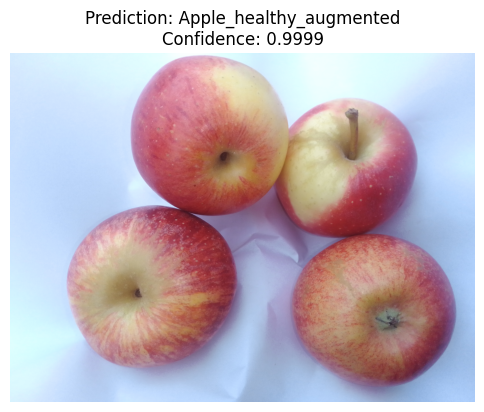

(np.float32(5.8001595e-05), np.str_('Apple_healthy_augmented'))

In [42]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_gradcam_heatmap(model, img_array, pred_index=None):
    """
    Generates a Grad-CAM heatmap for a given image.
    Uses a more explicit approach to avoid the 'never been called' error.
    """
    # First, we need to force the model to be built
    model(img_array)  # This will ensure the model is fully built
    
    # Get the ResNet50 base which is the first layer in the model
    resnet_base = model.layers[0]
    
    # Get the last convolutional layer in ResNet50
    last_conv_layer = resnet_base.get_layer('conv5_block3_out')
    
    # Create a standalone model that outputs both the final layer's activation
    # and the model's predictions
    last_conv_output = last_conv_layer.output
    model_output = model.output
    
    # Create a new model with the same inputs as the original model
    grad_model = tf.keras.Model(inputs=resnet_base.input, outputs=[last_conv_output, model_output])
    
    # Use gradient tape to compute gradients
    with tf.GradientTape() as tape:
        # Cast the image to float32 if it's not already
        img_tensor = tf.cast(img_array, tf.float32)
        
        # Call the gradient model
        conv_outputs, predictions = grad_model(img_tensor)
        
        # For binary classification, we focus on the positive class (index 0)
        if pred_index is None:
            pred_index = 0
            
        # Get the score for the target class
        class_score = predictions[:, pred_index]
    
    # Compute gradients of the target class with respect to the activations
    grads = tape.gradient(class_score, conv_outputs)
    
    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Multiply each channel in the feature map by the gradient importance
    last_conv_output = conv_outputs[0]
    heatmap = last_conv_output @ tf.reshape(pooled_grads, (-1, 1))
    heatmap = tf.reshape(heatmap, tf.shape(last_conv_output)[:2])
    
    # ReLU activation
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + tf.keras.backend.epsilon())
    
    return heatmap.numpy()

def superimpose_heatmap(img_path, heatmap, alpha=0.4):
    """
    Superimposes the Grad-CAM heatmap on the original image.
    """
    # Define standard dimensions
    IMAGE_DIMS = (224, 224)
    
    # Load the original image
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Error: Image at {img_path} not found!")
    
    # Resize image to standard dimensions
    img = cv2.resize(img, IMAGE_DIMS)
    
    # Resize heatmap to match image dimensions
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    # Convert heatmap to RGB format
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    # Superimpose the heatmap on original image
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    
    return superimposed_img

def gradcam_on_image(image_path, model, label_encoder=None):
    """
    Loads an image, computes Grad-CAM, and displays the heatmap.
    """
    # Define standard dimensions
    IMAGE_DIMS = (224, 224)
    
    # Load and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return
    
    img = cv2.resize(img, IMAGE_DIMS)
    img_array = img.astype(np.float32)
    
    # Preprocess for ResNet50
    img_array = img_array[..., ::-1]  # BGR to RGB
    img_array = img_array.copy()
    
    # Apply mean subtraction
    img_array[..., 0] -= 103.939
    img_array[..., 1] -= 116.779
    img_array[..., 2] -= 123.68
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Get model prediction
    pred = model.predict(img_array)
    pred_class = 1 if pred[0][0] > 0.5 else 0
    
    # Get class name if label_encoder is provided
    class_name = label_encoder.inverse_transform([pred_class])[0] if label_encoder else f"Class {pred_class}"
    
    # Generate GradCAM heatmap
    try:
        heatmap = get_gradcam_heatmap(model, img_array)
        superimposed_img = superimpose_heatmap(image_path, heatmap)
        
        # Display the results
        plt.figure(figsize=(10, 5))
        
        # Original image
        plt.subplot(1, 2, 1)
        orig_img = cv2.imread(image_path)
        orig_img = cv2.resize(orig_img, IMAGE_DIMS)
        plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        
        # Grad-CAM visualization
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        confidence = pred[0][0] if pred_class == 1 else 1 - pred[0][0]
        plt.title(f"Grad-CAM: {class_name}\nConfidence: {confidence:.4f}")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return pred[0][0], class_name
    
    except Exception as e:
        print(f"Error generating GradCAM: {str(e)}")
        # As a fallback, just display the original image and prediction
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        confidence = pred[0][0] if pred_class == 1 else 1 - pred[0][0]
        plt.title(f"Prediction: {class_name}\nConfidence: {confidence:.4f}")
        plt.axis('off')
        plt.show()
        
        return pred[0][0], class_name

# Example usage:
gradcam_on_image("Fruit And Vegetable Diseases Dataset/Apple__Healthy/FreshApple (1).jpg", model, label_encoder)

In [47]:
# Cell 16: Evaluation Metrics (Precision, Recall, F1, etc.)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Get predictions on the entire validation set (valX and valY were defined in Cell 10)
# Note: Since you're using generators for training, you can use the original valX, valY arrays.
y_pred_probs = model.predict(valX)  # Model outputs probabilities
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
y_true = valY.flatten()  # True labels

# Compute and print evaluation metrics
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision: {precision_score(y_true, y_pred):.4f}")
print(f"Recall: {recall_score(y_true, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step
Classification Report:
                          precision    recall  f1-score   support

Apple_healthy_augmented       0.99      0.99      0.99       488
 Apple_rotten_augmented       0.99      0.99      0.99       585

               accuracy                           0.99      1073
              macro avg       0.99      0.99      0.99      1073
           weighted avg       0.99      0.99      0.99      1073

Confusion Matrix:
 [[485   3]
 [  3 582]]
Accuracy: 0.9944
Precision: 0.9949
Recall: 0.9949
F1 Score: 0.9949


In [5]:
import time
import numpy as np
import tensorflow as tf
import cv2
from imutils import paths
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# ----- Parameters -----
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
IMAGE_DIMS = (224, 224)
DATASET_DIR = "C:/Users/Souma Chakraborty/OneDrive/Desktop/ML_RESEARCH/Fruit And Vegetable Diseases Dataset"
ALLOWED_CLASSES = {"Apple_healthy_augmented", "Apple_rotten_augmented"}
MODEL_SAVE_PATH = "C:/Users/Souma Chakraborty/OneDrive/Desktop/ML_RESEARCH/apple_resnet_tf.h5"
MODEL_TFLITE_PATH = "apple_resnet_tf_quant.tflite"  # Path to your quantized model

# ----- Minimal Data Loading & Preprocessing Functions -----
def load_data(dataset_dir, allowed_classes):
    data = []
    labels = []
    imagePaths = list(paths.list_images(dataset_dir))
    print(f"Found {len(imagePaths)} images in total.")
    for imagePath in imagePaths:
        label = imagePath.split(os.path.sep)[-2]
        if label not in allowed_classes:
            continue
        image = cv2.imread(imagePath)
        if image is None:
            continue
        image = cv2.resize(image, IMAGE_DIMS)
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(label)
    if not data:
        raise ValueError("No images were processed. Check your dataset directory and paths.")
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    print(f"Processed {len(data)} images.")
    print(f"Class mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    return np.array(data, dtype="float32"), np.array(labels), le

def preprocess_data(data, labels, test_size=0.2):
    trainX, valX, trainY, valY = train_test_split(data, labels, test_size=test_size, 
                                                  stratify=labels, random_state=42)
    print(f"Training set: {len(trainX)} images")
    print(f"Validation set: {len(valX)} images")
    return trainX, valX, trainY, valY

# ----- Load Validation Data -----
data, labels, label_encoder = load_data(DATASET_DIR, ALLOWED_CLASSES)
_, valX, _, valY = preprocess_data(data, labels)

# ----- H5 Model Evaluation -----
print("\n--- Evaluating H5 Model ---")
model_h5 = tf.keras.models.load_model(MODEL_SAVE_PATH)
if not model_h5.built:
    dummy_input = tf.zeros((1, IMAGE_DIMS[0], IMAGE_DIMS[1], 3))
    _ = model_h5(dummy_input)

num_samples = 100
sample_data = valX[:num_samples]
_ = model_h5.predict(sample_data)  # Warm-up

start_time = time.time()
_ = model_h5.predict(sample_data)
end_time = time.time()
inf_time_h5 = (end_time - start_time) / num_samples
print(f"Average inference time per sample (H5 model): {inf_time_h5*1000:.2f} ms")

y_pred_probs = model_h5.predict(valX)
y_pred_h5 = (y_pred_probs > 0.5).astype(int).flatten()
accuracy_h5 = accuracy_score(valY, y_pred_h5)
print(f"Accuracy (H5 model): {accuracy_h5:.4f}")

# ----- TFLite Model Evaluation -----
print("\n--- Evaluating TFLite Model ---")
interpreter = tf.lite.Interpreter(model_path=MODEL_TFLITE_PATH)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Ensure sample data is cast to the correct type for TFLite
sample_data_quant = sample_data.astype(input_details[0]['dtype'])

# Warm up TFLite interpreter
for i in range(5):
    interpreter.set_tensor(input_details[0]['index'], sample_data_quant[i:i+1])
    interpreter.invoke()
    _ = interpreter.get_tensor(output_details[0]['index'])

start_time = time.time()
for i in range(num_samples):
    interpreter.set_tensor(input_details[0]['index'], sample_data_quant[i:i+1])
    interpreter.invoke()
    _ = interpreter.get_tensor(output_details[0]['index'])
end_time = time.time()
inf_time_tflite = (end_time - start_time) / num_samples
print(f"Average inference time per sample (TFLite model): {inf_time_tflite*1000:.2f} ms")

quant_predictions = []
for i in range(len(valX)):
    sample = valX[i:i+1].astype(input_details[0]['dtype'])
    interpreter.set_tensor(input_details[0]['index'], sample)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    pred = 1 if output_data[0][0] > 0.5 else 0
    quant_predictions.append(pred)
quant_predictions = np.array(quant_predictions)
accuracy_tflite = accuracy_score(valY, quant_predictions)
print(f"Accuracy (TFLite model): {accuracy_tflite:.4f}")


Found 7579 images in total.
Processed 5362 images.
Class mapping: {np.str_('Apple_healthy_augmented'): np.int64(0), np.str_('Apple_rotten_augmented'): np.int64(1)}
Training set: 4289 images
Validation set: 1073 images

--- Evaluating H5 Model ---


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Average inference time per sample (H5 model): 46.97 ms
34/34 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
Accuracy (H5 model): 0.9944

--- Evaluating TFLite Model ---
Average inference time per sample (TFLite model): 59.01 ms
Accuracy (TFLite model): 0.9935
